# The first part of the assignment, IDS 2021-2022
In this Jupyter notebook, please, document your results and the way you have obtained them. You can use the attached yaml file to build Python environment for this assignment. Another option (and the easiest way) is to just use the _Python environment_ provided at the beginning of the course and then use *pip install* to install *p_decision_tree* library. You can find the required yaml file in the folder of this assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. 
    
    2. 
    
    3.

## Dataset
Almost all of us have the experience of being stuck in an airport because our flight was delayed or canceled. As a person who knows how to analyze data, we all wondered if we could have predicted it if we had access <b>to</b>  the data. This is your chance to find out.

In this assignment, you will perform some analysis on a flight delay dataset. This dataset is provided by the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) which tracks the on-time performance of domestic flights operated by large air carriers. In the following, you can find the definition of some of the features in this dataset.

<b>Airline delay.</b> 
This type of delay pertains to the status within the airline’s control. For example, problems with maintenance and crew, cleaning within the cabin, fueling, and baggage loading could all be contributing factors to a delayed flight. 

<b>Security delay.</b> 
Security delay is caused by evacuation of a terminal or concourse, re-boarding of an aircraft because of a security breach, inoperative screening equipment, and/or long lines in excess of 29 minutes at screening areas.

<b>Weather delay.</b> 
Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.

<b>Late aircraft delay.</b> 
Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

<b>Taxi in/out.</b> 
Taxi time is the total time of an aircraft's movement on the ground.

<b>Wheels-off.</b> 
The time that an aircraft lifts off from the origin airport.
    
<b>Wheels-on.</b> 
 The time that an aircraft lands at the designated airport.

<b> Air time.</b> 
The time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing.

## Question 0 - Preprocessing of the Dataset 
 Carry out the following preprocessing steps before starting the analysis:
 - Select 95% of the dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the newly generated dataset (which contains 95% of the data) to <b>sampled_data</b>.
 - If it is not mentioned otherwise, you should always use <b>sampled_data</b> created in this step as input for the questions.
 
<font color="red">Note: Your assignment would not be graded if this step is not done. </font>

In [114]:
# Your code
#!!!!!!!!!!!!!!!!!!!!!!!!both dataset are different. Check if flight.csv or dataset.csv
import pandas as pd

data = pd.read_csv("dataset.csv")
print(len(data))
sampled_data = data.sample(frac=0.95, random_state=354921)
print(len(sampled_data))
print(len(sampled_data)/len(data))

940635
893603
0.9499997342220946


## Question 1 - Insights into the Data (20 points):

### Setting of this Question:
We want to make ourselves familiar with the data. To this end, we start with an explorative data analysis. You are more than welcome to provide a deeper analysis and generate more visualizations to understand the data better. Please follow the next two parts.

### Part 1: Basic data analysis
To investigate the data, we take a look at some of the basic statistics and properties of the data.

#### a) Unique values: 
Mention the unique values for cancelation reason in the <b>sampled_data</b>. Also, mention the unique values of this feature where the flights have been canceled and where the flights have not been canceled. Explain the difference.

In [115]:
# Your code

print(sampled_data['CANCELLATION_REASON'].unique())
print(sampled_data[sampled_data['CANCELLED'] == 1]['CANCELLATION_REASON'].unique())
print(sampled_data[sampled_data['CANCELLED'] == 0]['CANCELLATION_REASON'].unique())

['N' 'C' 'B' 'A' 'D']
['C' 'B' 'A' 'D']
['N']


    Your answer:
    

#### b) Null values: 
Remove all the rows with null values from the <b>sampled_data</b>. Let's call this new dataset <b>no_null_data</b>. Show the unique values for cancelation reason in <b>no_null_data</b> and compare them to the unique values in <b>sampled_data</b>. Can you explain the difference? 

In [116]:
# Your code

#print(sampled_data.isnull().sum().sort_values(ascending=False))
print("No. of null values in 'sampled_data' : ", sampled_data.isnull().sum().sum())
no_null_data = sampled_data.dropna()
print(len(no_null_data))
print("No. of null values in 'no_null_data' : ", no_null_data.isnull().sum().sum())

No. of null values in 'sampled_data' :  1286818
808171
No. of null values in 'no_null_data' :  0


    Your answer:
    

#### c) Boxplot:
Use <b>no_null_data</b> dataset to create a new dataset including all the flights from airline 'EV' which have at least 2 hours but at most 6 hours of delay. Let's call this data <b>ev_data</b>.

Use a boxplot to create two datasets from <b>ev_data</b> by finding and removing the outliers from the following attributes:
   - Late aircraft delay, call this dataset <b>cleaned_data_late_aircraft</b>,
   - Air system delay, call this dataset <b>cleaned_data_air_system</b>.
    
Note that based on the boxplot, the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers.

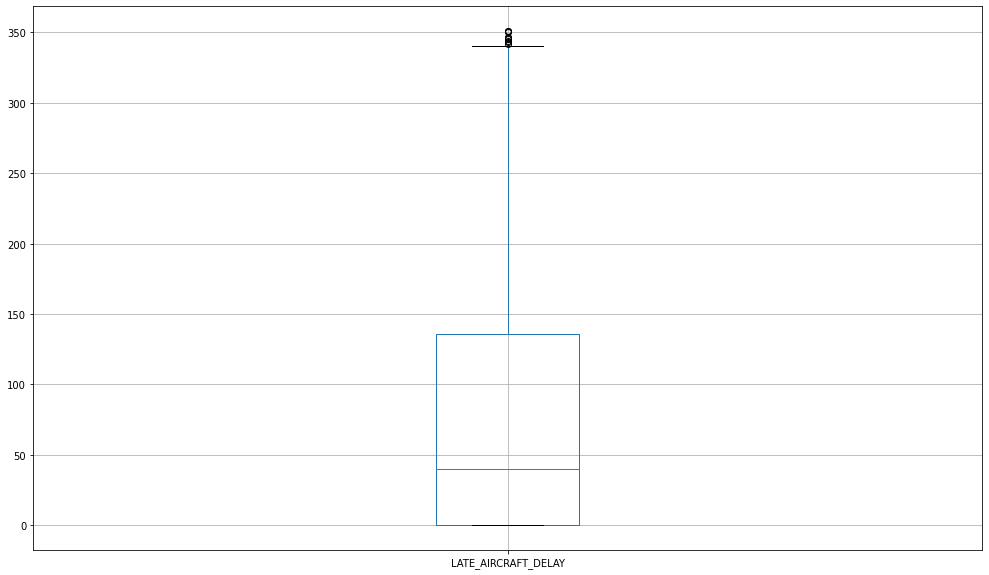

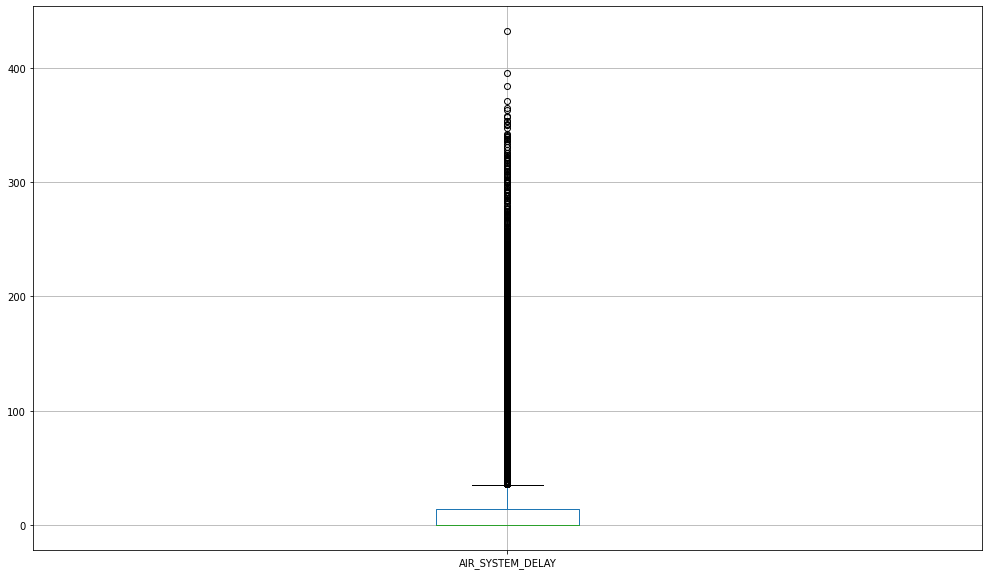

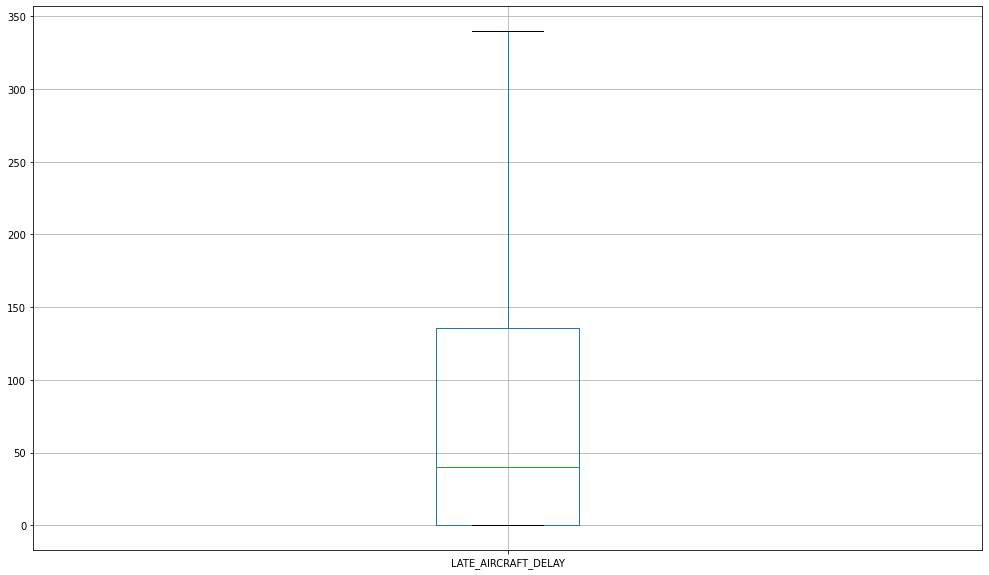

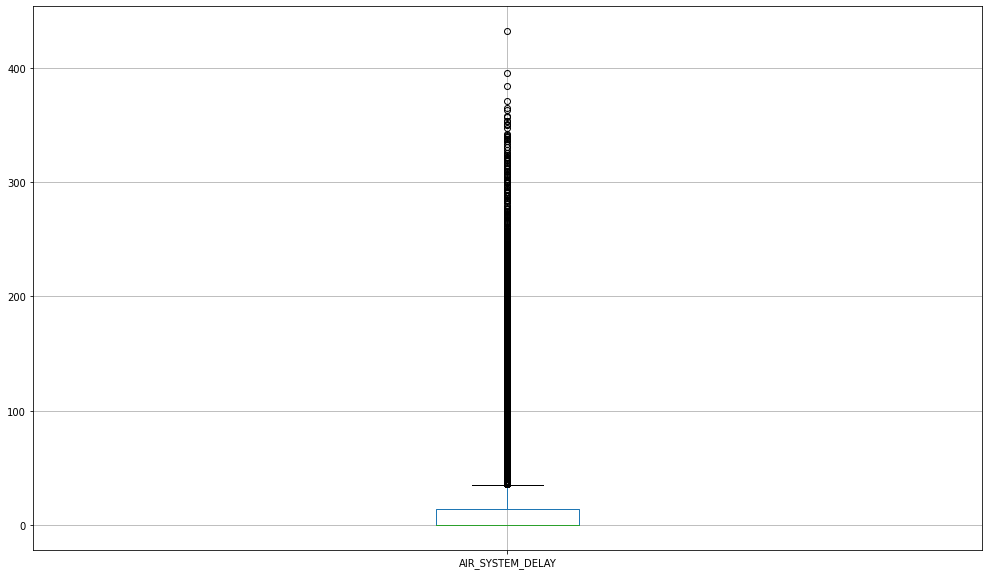

In [117]:
# Your code
#!!!!!!!!!!!!!!!!!!!ARRIVAL DELAY IS USED ON MAIN CODE??

import matplotlib.pyplot as plt

#print(data.columns)

ev_data = no_null_data[(no_null_data['AIRLINE'] == 'EV') & (no_null_data['DEPARTURE_DELAY'] >= 2*60)
                       & (no_null_data['DEPARTURE_DELAY'] <= 6*60)] #check if DELAY is the right feature.
#print(no_null_data['ARRIVAL_DELAY'].describe())
ev_data.boxplot('LATE_AIRCRAFT_DELAY')
plt.show()
ev_data.boxplot('AIR_SYSTEM_DELAY')
plt.show()

def remove_outliers(x):
    Q1 = ev_data[x].quantile(0.25)
    Q3 = ev_data[x].quantile(0.75)
    IQR = Q3 - Q1 
    filter = (ev_data[x] >= Q1 - 1.5 * IQR) & (ev_data[x] <= Q3 + 1.5 *IQR)
    return ev_data.loc[filter]
    
cleaned_data_late_aircraft = remove_outliers('LATE_AIRCRAFT_DELAY')
cleaned_data_air_system = remove_outliers('AIR_SYSTEM_DELAY')

cleaned_data_late_aircraft.boxplot('LATE_AIRCRAFT_DELAY')
plt.show()
cleaned_data_late_aircraft.boxplot('AIR_SYSTEM_DELAY')
plt.show()
#cleaned_data_late_aircraft.describe()
#cleaned_data_air_system.describe()

#### d) Basic statistics: 
Compare basic statistical features of arrival delay (median, mean, and mode, standard deviation, variance) in the <b>ev_data</b>, <b>cleaned_data_late_aircraft</b>, and <b>cleaned_data_air_system</b>. 

Interpret the differences for these statistical values between these three datasets. 

In [118]:
# Your code
import numpy as np

ev_data_median = np.median(ev_data['ARRIVAL_DELAY'])
ev_data_mean = np.mean(ev_data['ARRIVAL_DELAY'])
#ev_data_mode = np.
ev_data_std = np.std(ev_data['ARRIVAL_DELAY'])
ev_data_var = np.var(ev_data['ARRIVAL_DELAY'])


cleaned_data_late_aircraft_median = np.median(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_mean = np.mean(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
#cleaned_data_late_aircraft_mode
cleaned_data_late_aircraft_sd = np.std(cleaned_data_late_aircraft['ARRIVAL_DELAY'])
cleaned_data_late_aircraft_var = np.var(cleaned_data_late_aircraft['ARRIVAL_DELAY'])


cleaned_data_air_system_median = np.median(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_mean = np.mean(cleaned_data_air_system['ARRIVAL_DELAY'])
#cleaned_data_air_system_mode
cleaned_data_air_system_sd = np.std(cleaned_data_air_system['ARRIVAL_DELAY'])
cleaned_data_air_system_var = np.var(cleaned_data_air_system['ARRIVAL_DELAY'])





print(ev_data_median)
print(ev_data_mean)
#ev_data_mode = np.
print(ev_data_std)
print(ev_data_var)


print(cleaned_data_late_aircraft_median)
print(cleaned_data_late_aircraft_mean)
#cleaned_data_late_aircraft_mode
print(cleaned_data_late_aircraft_sd)
print(cleaned_data_late_aircraft_var)


print(cleaned_data_air_system_median)
print(cleaned_data_air_system_mean)
#cleaned_data_air_system_mode
print(cleaned_data_air_system_sd)
print(cleaned_data_air_system_var)

166.0
181.1332669322709
58.11867897244785
3377.7808455024524
166.0
180.98165686372246
57.9235645533107
3355.1393305615516
162.0
177.64639101338432
56.48921692628269
3191.0316289446228


    Your answer: 
    

### Part 2: Basic visualization

#### a) Mean visualization: 
Visualize and compare the mean of arrival delay per month in the <b>no_null_data</b>. Just based on this information, if you prefer the minimum delay, which two months would be a good option to book a ticket and which two months are the worst.

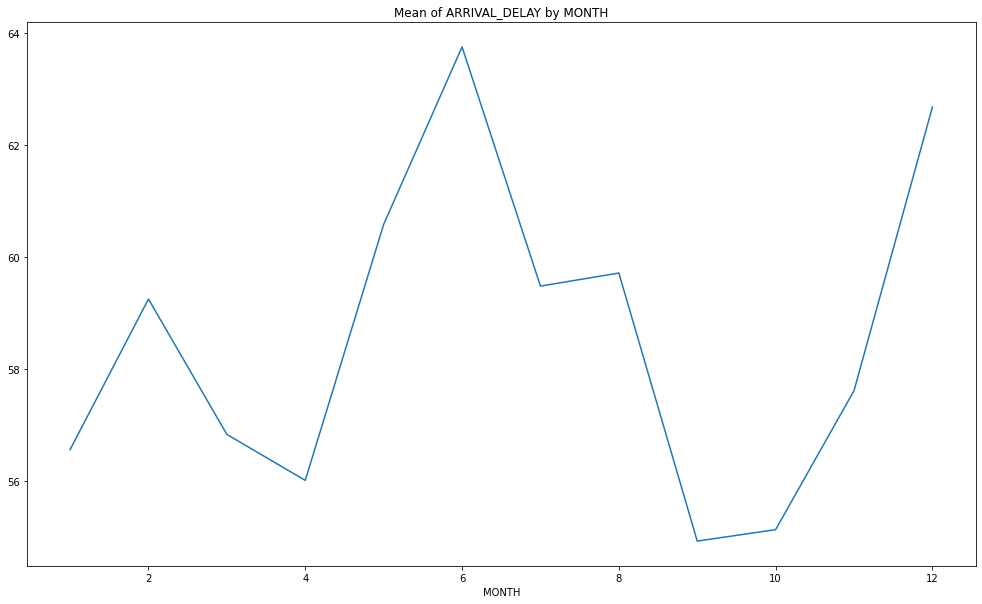

Best month would be 9 and 10. Worst will be 6 and 12


In [119]:
"""months = sorted(no_null_data['MONTH'].unique())
mean_of_months = [np.mean(no_null_data[no_null_data['MONTH'] == month]['ARRIVAL_DELAY']) for month in months]
plt.plot(months, mean_of_months)
plt.show()"""

mean_AD_by_months = no_null_data.groupby('MONTH')['ARRIVAL_DELAY'].mean()
mean_AD_by_months.plot()
plt.title("Mean of ARRIVAL_DELAY by MONTH")
plt.show()

print("Best month would be 9 and 10. Worst will be 6 and 12")

#### b) Mean visualization:
Visualize and compare the mean of weather delay per month in the <b>no_null_data</b>. Which month has the minimum and which month has the maximum average weatherdelay? 

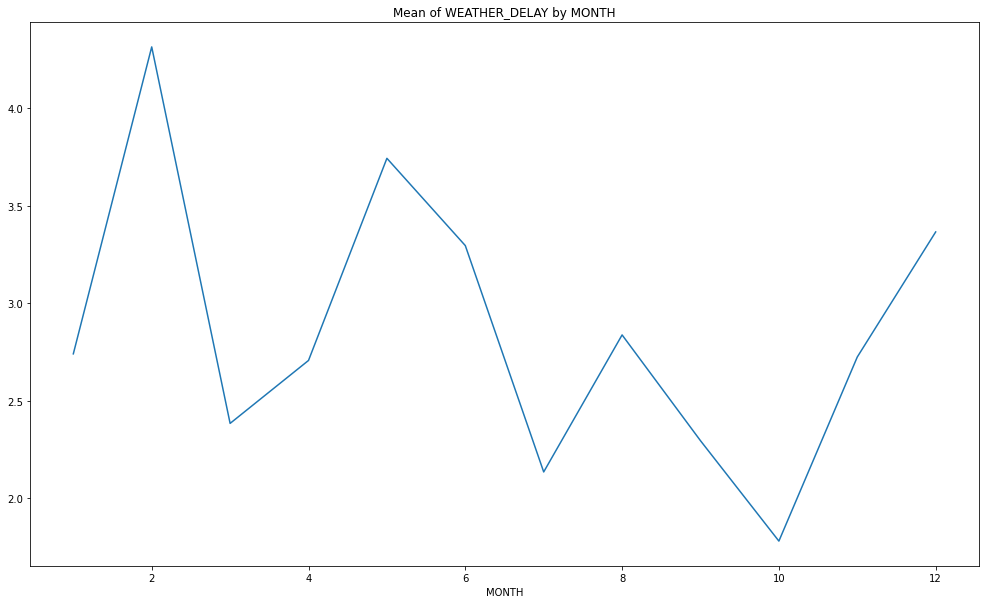

In [120]:
# Your code

mean_WD_by_months = no_null_data.groupby('MONTH')['WEATHER_DELAY'].mean()
mean_WD_by_months.plot()
plt.title("Mean of WEATHER_DELAY by MONTH")
plt.show()

    Your answer:
Max weather delay on month 2 and min weather delay on month 10

#### c) Interpretation:
Based on the visualization of the two previous tasks, can you detect any possible relationship between the arrival delay and weather delay per month? If yes, please explain.

    Your answer:
    When weather delay increases, arrival delay also increases. If arrival delay includes the delay due to weather also, this makes sense.

#### d) Mean visualization: 
Now visualize the mean of arrival delay per day of the week (per 7 week days) in each month. Based on this information, which combination of days of week and months should be avoided to decrease the possibility of the arrival delay the most? Provide 5 combinations of days of week and months.

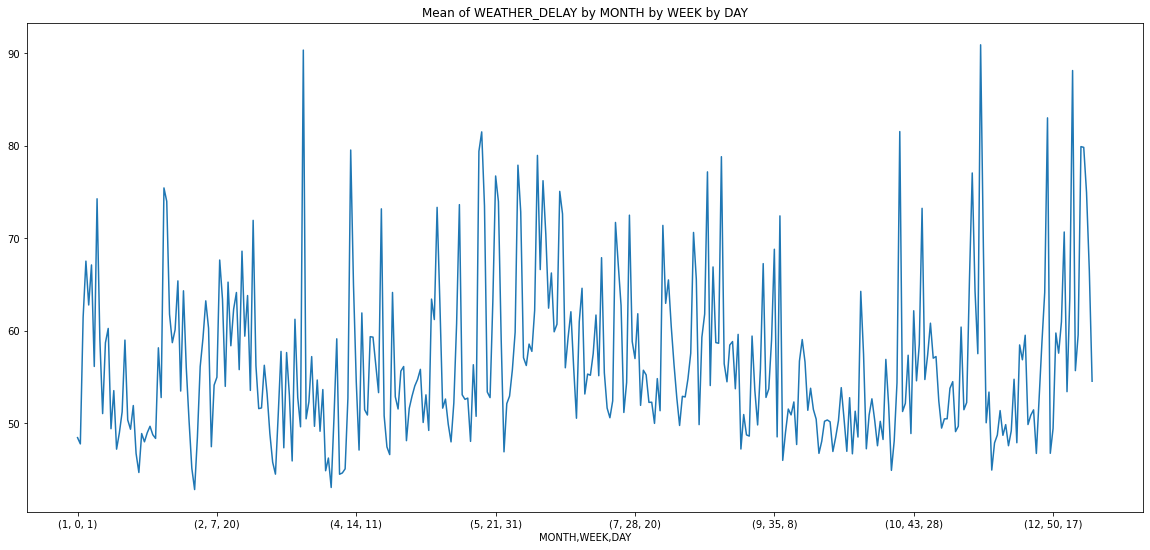

MONTH  WEEK  DAY
11     46    21     90.879286
3      11    23     90.309048
12     51    24     88.100939
       49    15     82.991637
10     42    23     81.512292
Name: ARRIVAL_DELAY, dtype: float64


In [121]:
# Your code
#??????????????
mean_AD_by_months_weeks_days = no_null_data.groupby(['MONTH', 'WEEK', 'DAY'])['ARRIVAL_DELAY'].mean()
mean_AD_by_months_weeks_days.plot(figsize=(20,9))
plt.title("Mean of WEATHER_DELAY by MONTH by WEEK by DAY")
plt.show()

print(mean_AD_by_months_weeks_days.sort_values(ascending=False).head())

    Your answer:
Above combination of months, weeks and days have maximum delay.

#### e) Distribution:
 In <b>no_null_data</b>, plot the distribution of weather delay for those flights with at least 3 hours of weather delay.

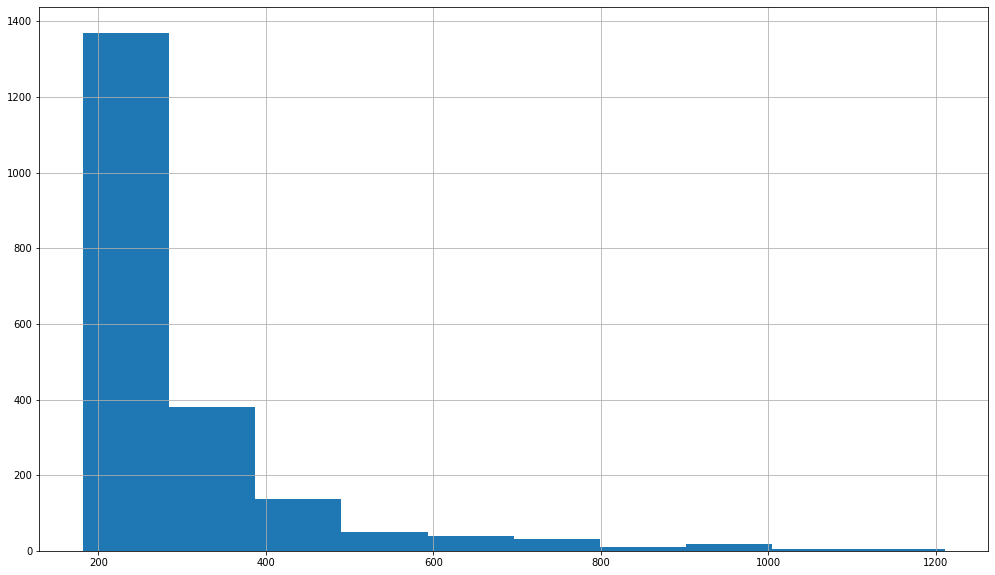

In [122]:
# Your code

atleast_3_WD = no_null_data[no_null_data['WEATHER_DELAY'] > 3*60]['WEATHER_DELAY']
atleast_3_WD.hist()
plt.show()

#### f) Monthly distribution:
Plot the monthly distribution of weather delay in one figure where weather delay is more than 3 hours in <b>no_null_data</b>.

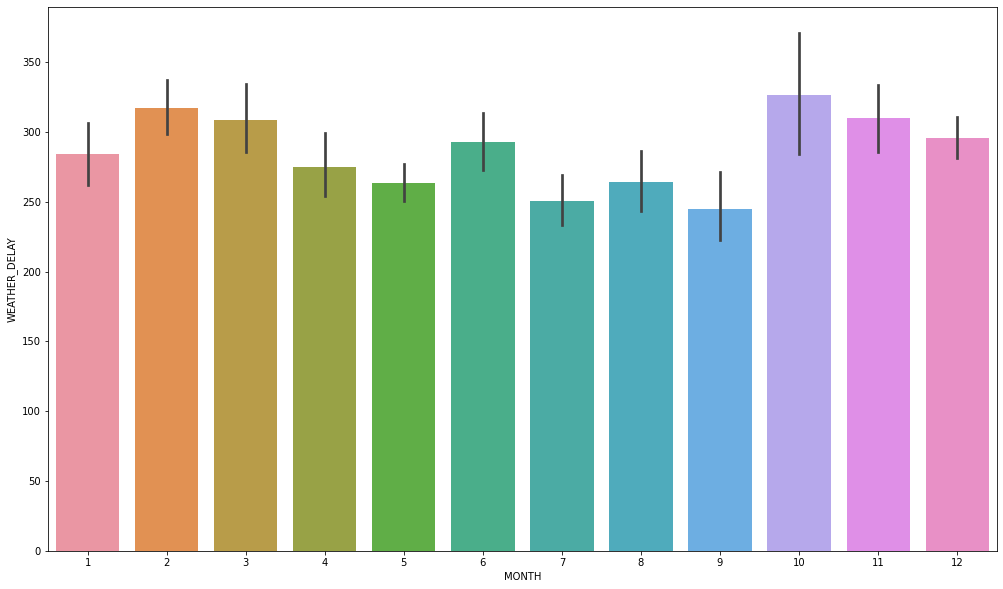

In [123]:
# Your code
import seaborn as sns

"""WD_more_than_3_by_month = no_null_data[no_null_data['WEATHER_DELAY'] > 3*60].groupby('MONTH')['WEATHER_DELAY']
print(WD_more_than_3_by_month)
WD_more_than_3_by_month.hist(figsize=(15, 9))
plt.show()"""

WD_more_than_3_by_month = no_null_data[no_null_data['WEATHER_DELAY'] > 3*60]
sns.barplot(x='MONTH', y='WEATHER_DELAY', data=WD_more_than_3_by_month)
plt.show()

#### g) Joint distribution:
Explore the distribution of weather delay and arrival delay together in the <b>no_null_data</b> for airlines 'EV' and 'VX', considering only the flights that the arrival delay is more than 6 hours. Can you find any similarities or differences among them? Please explain.

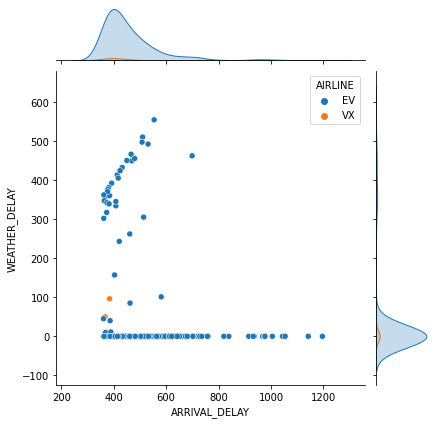

In [124]:
# Your code
EV_VX_data = no_null_data[((no_null_data['AIRLINE'] == 'EV') | (no_null_data['AIRLINE'] == 'VX'))
                          & (no_null_data['ARRIVAL_DELAY'] > 6*60)]
sns.jointplot(data=EV_VX_data, x="ARRIVAL_DELAY", y="WEATHER_DELAY", kind="scatter", hue='AIRLINE')
plt.show()

       Your answer:


## Question 2 - Decision Trees (10 points):

### Setting of this Question:
We want to buy a ticket from 'UA' airline. As we are not a big fan of flights that have a long delay, we have decided to use a decision tree to find the best time to buy the ticket. Our plan is to use a decision tree to predict the arrival delay. But first, we need to preprocess the data. Please do the following tasks.  

#### a) Data preprocessing: 
Use <b>no_null_data</b> for this task and filter it such that the resulting dataset contains only the flights from 'UA' airline that has some (non zero) arrival delay. 

First, discretizing the arrival delay as follows:
 - if the delay is at most 45 minutes, the value of the new attribute should be 'acceptable_delay',
 - else, the value of the new attribute should be 'unacceptable_delay',
 
Let's call this new categorical feature 'DELAY'.

Second, discretize the distance into two equal-width bins and name them 'short' and 'long'. Let's call this new feature 'DISTANCE_CATEGORY'.

824010     40.0
389469     50.0
673518     23.0
147525    145.0
930415     83.0
Name: ARRIVAL_DELAY, dtype: float64
824010      acceptable_delay
389469    unacceptable_delay
673518      acceptable_delay
147525    unacceptable_delay
930415    unacceptable_delay
Name: DELAY, dtype: object


/tmp/ipykernel_22189/88106084.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data['DELAY'] = np.where(prep_data['ARRIVAL_DELAY'] <= 45, 'acceptable_delay', 'unacceptable_delay')
/tmp/ipykernel_22189/88106084.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data['DISTANCE_CATEGORY'] = np.where(prep_data['DISTANCE'] <= mid, 'short', 'long')


<AxesSubplot:>

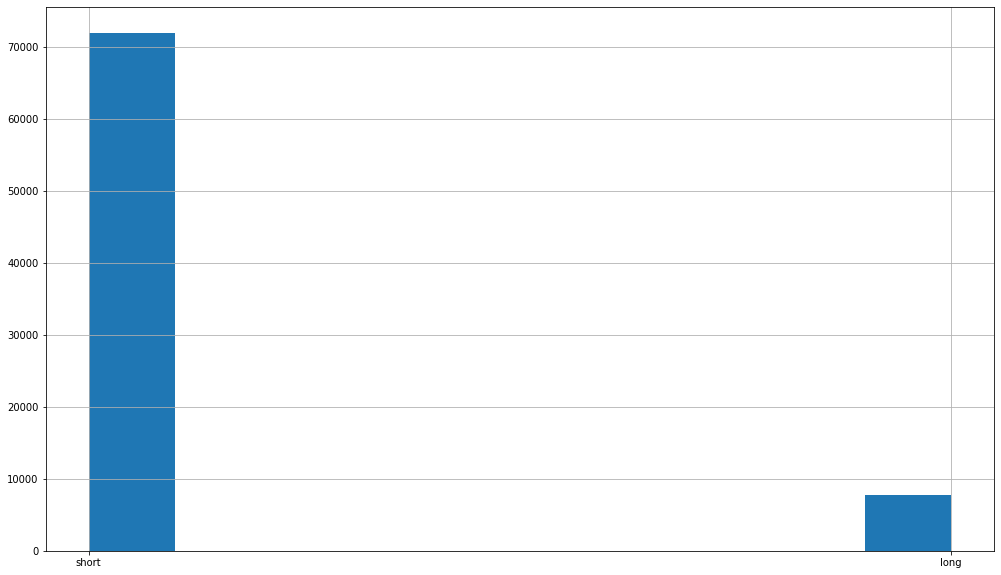

In [125]:
# Your code
prep_data = no_null_data[(no_null_data['AIRLINE'] == 'UA') & (no_null_data['ARRIVAL_DELAY'] != 0)]
print(prep_data['ARRIVAL_DELAY'].head())
prep_data['DELAY'] = np.where(prep_data['ARRIVAL_DELAY'] <= 45, 'acceptable_delay', 'unacceptable_delay')
print(prep_data['DELAY'].head())

mid = (prep_data['DISTANCE'].max() - prep_data['DISTANCE'].min())/2
prep_data['DISTANCE_CATEGORY'] = np.where(prep_data['DISTANCE'] <= mid, 'short', 'long')
prep_data['DISTANCE_CATEGORY'].hist()

#### b) Decision tree:
Consider the extended dataset from the previous task (task a). Use 'SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', and 'DAY_OF_WEEK' as descriptive features. Generate a decision tree in which the minimum number of samples for splitting is 1000.

Note: for this task, you must use p_decision_tree library. You can use the attached yaml file to build Python environment for this task. The easiest way is to just use *pip install*.

/tmp/ipykernel_22189/2411466599.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prep_data[column] = prep_data[column].astype(str)


Descriptive feature : ['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']
Target feature : DELAY


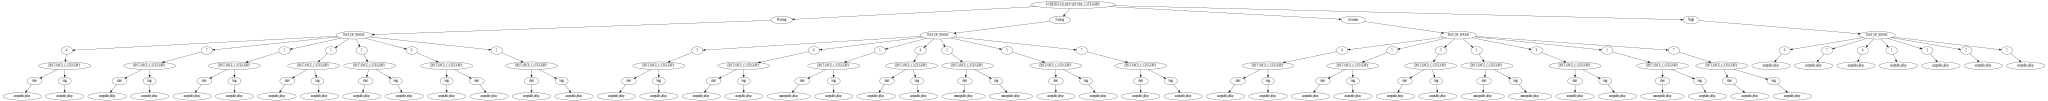

In [126]:
# Your code

#import pip
#pip.main(['install', 'p_decision_tree'])
from p_decision_tree.DecisionTree import DecisionTree
from matplotlib import figure

#decisionTree = DecisionTree()
columns = prep_data.columns

for column in columns:
    prep_data[column] = prep_data[column].astype(str)
    
descriptive_features = ['SCHEDULED_DEPARTURE_CATEGORY', 'DISTANCE_CATEGORY', 'DAY_OF_WEEK']
label = 'DELAY'
data_descriptive = prep_data[descriptive_features].values

data_label = prep_data[label].values

#prep_data[descriptive_features].info()

print('Descriptive feature :', descriptive_features)
print('Target feature :', label)

decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features, data_label.tolist(), "entropy")

decisionTree.id3(0,1000)

dot = decisionTree.print_visualTree(render=False)
display(dot)
#print(dot)

#print("System entropy: ", format(decisionTree.entropy))
#print("System gini: ", format(decisionTree.gini))

#### c) ID3 feature selection:
In the generated decision tree, what is the best feature (based on entropy) for splitting the tree in the second round of ID3 considering the value of the feature chosen in the first round of ID3?       

    Your answer:For every chosen value after first round, the best feature for splitting on round 2 is DAY_OF_WEEK
    

#### d) Rule interpretation:
Based on the discovered decision tree, which conditions are more prone to more than 45 minutes delay. Explain two rules.

    Your answer:


## Question 3 - Classification Models and Prediction (50 Points):

### Background of this Question:
You heard from a friend that you are entitled to receive a payment of at least 150€ if your flight is delayed by more than 3 hours. Very excited, you are reminded of your IDS course and the flight dataset you had to analyze back then. You start to imagine a model trained on these flights that can predict if your future flights are delayed by three hours and, basically, allow you to travel the world for free if it chooses these flights correctly. You remember your IDS lecture and what you have to do to make your dream come true: You want to prepare the data accordingly, i.e., you model the target variable of being delayed by more than 3 hours and you choose and model the descriptive variable that you want to use for predicting delay. For the evaluation of your models, you have to choose an evaluation metric that describes whether the flights chosen by your model are actually delayed by <b> at least </b> 3 hours. Moreover, for the models, you want to train different regression, SVM, and neural network models with different parameters and find the best one. In the end, you should calculate for which flight price your model lets you travel the world for free.
### Parts of this question:
We want you to systematically approach the questions. So we take the following steps (parts): preparing the data, what is the target variable, what are your descriptive variables, what is the evaluation measure you are trying to maximize, and what is the baseline you should at least be better than?

### Part 0: Preparing the dataset

Load the classification dataset; i.e., <b>flights_classifying.csv</b>.

In [127]:
# Your code
import pandas as pd
flight_data = pd.read_csv('flights_classifying.csv')

Randomly order the data points using one of the group member's students as the random state.

In [128]:
# Your code
sampled_data = flight_data.sample(frac=1, random_state=354921)
#print(sampled_data.CANCELLED)

### Part 1: Designing your variables and evaluation

#### a) Target feature:
Design your target feature such that you can predict whether a flight is delayed by more than 3 hours or not and add it to the dataset. Drop all data points that contain a canceled flight.

In [129]:
# Your code

processed_data = sampled_data.copy().drop(sampled_data[sampled_data['CANCELLED'] == 1].index)
print(len(sampled_data))
print(len(processed_data))

processed_data['DELAYED'] = np.where(processed_data['ARRIVAL_DELAY'] > 3*60, 1, 0 )
y = processed_data['DELAYED']
print(len(processed_data[processed_data['DELAYED'] == 1]))

579509
525584
37819


#### b) Descriptive features:
Please select your descriptive features and motivate your choice. Always consider the setting and whether choosing these features makes sense concerning the setting of the question. Apply the necessary transformations.

<AxesSubplot:>

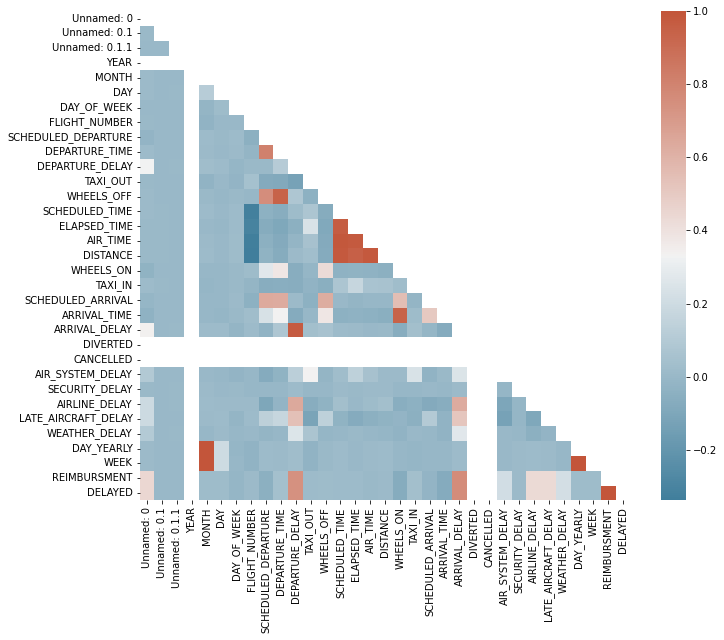

In [130]:
import seaborn as sns 

#sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

corr = processed_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(11, 9))
sns.heatmap(corr, cmap=cmap, mask=mask)

In [131]:
# Your code
#print(processed_data.info())
from sklearn.preprocessing import Normalizer

object_columns = processed_data.select_dtypes('object').columns
#print(object_columns)
processed_data_non_obj = processed_data.drop(columns=object_columns)
processed_data_non_obj = (processed_data_non_obj - processed_data_non_obj.min())/(processed_data_non_obj.max() - processed_data_non_obj.min())
#transformer = Normalizer().fit(processed_data_non_obj)
#processed_data_non_obj = transformer.transform(processed_data_non_obj)

#print(sampled_data.info())
#print(processed_data.dtypes=='object')
#encoded_data = pd.get_dummies(processed_data, drop_first=True)
target_correlation = processed_data_non_obj.apply(lambda x: x.corr(processed_data['DELAYED']))

del processed_data_non_obj

In [132]:
print(target_correlation.sort_values(ascending=False))

DELAYED                1.000000
REIMBURSMENT           1.000000
ARRIVAL_DELAY          0.762993
DEPARTURE_DELAY        0.739666
Unnamed: 0             0.445077
LATE_AIRCRAFT_DELAY    0.433048
AIRLINE_DELAY          0.430774
WEATHER_DELAY          0.216970
AIR_SYSTEM_DELAY       0.213825
DEPARTURE_TIME         0.040126
TAXI_IN                0.033996
WHEELS_OFF             0.021480
DAY_YEARLY             0.019348
WEEK                   0.018983
MONTH                  0.018155
DAY                    0.017439
TAXI_OUT               0.016634
SCHEDULED_TIME         0.015307
ELAPSED_TIME           0.011977
SECURITY_DELAY         0.010875
DISTANCE               0.007480
FLIGHT_NUMBER          0.006878
AIR_TIME               0.004975
Unnamed: 0.1.1         0.000531
Unnamed: 0.1           0.000117
DAY_OF_WEEK           -0.011863
SCHEDULED_ARRIVAL     -0.020984
SCHEDULED_DEPARTURE   -0.045945
WHEELS_ON             -0.069415
ARRIVAL_TIME          -0.074780
YEAR                        NaN
DIVERTED

In [133]:
"""processed_data_obj = processed_data[object_columns]

print(object_columns)
print(processed_data_obj.apply(lambda x: x.value_counts().count()))
processed_data_obj_dropped = processed_data_obj.drop(columns=['TAIL_NUMBER', 'CANCELLATION_REASON'])
encoded_obj_data = pd.get_dummies(processed_data_obj_dropped, drop_first=True)
print(len(encoded_obj_data.columns))
encoded_obj_data = (encoded_obj_data - encoded_obj_data.mean())/encoded_obj_data.std()

print(encoded_obj_data.apply(lambda x: x.corr(processed_data['DELAYED'])).sort_values(ascending=False))

del encoded_obj_data
del processed_data_obj_dropped"""

"processed_data_obj = processed_data[object_columns]\n\nprint(object_columns)\nprint(processed_data_obj.apply(lambda x: x.value_counts().count()))\nprocessed_data_obj_dropped = processed_data_obj.drop(columns=['TAIL_NUMBER', 'CANCELLATION_REASON'])\nencoded_obj_data = pd.get_dummies(processed_data_obj_dropped, drop_first=True)\nprint(len(encoded_obj_data.columns))\nencoded_obj_data = (encoded_obj_data - encoded_obj_data.mean())/encoded_obj_data.std()\n\nprint(encoded_obj_data.apply(lambda x: x.corr(processed_data['DELAYED'])).sort_values(ascending=False))\n\ndel encoded_obj_data\ndel processed_data_obj_dropped"

In [134]:
descriptive_features = ['REIMBURSMENT',
'ARRIVAL_DELAY',      
'DEPARTURE_DELAY',  
'Unnamed: 0',         
'LATE_AIRCRAFT_DELAY',
'AIRLINE_DELAY',
'WEATHER_DELAY',      
'AIR_SYSTEM_DELAY']

#Removing one of highly correlated feature
descriptive_features.remove('REIMBURSMENT')

X = processed_data[descriptive_features]

Split your data into training and testing data, with 85% of the dataset going to testing data.

In [135]:
# Your code
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.85, random_state=416087)

#### c) Evaluation metric
Discuss and choose an evaluation metric that you can evaluate your predictions against. Hint: Be aware of the setting of this questions, i.e., what your goal is.

In [136]:
#you may put code here, if necessary


    Your answer: Since the data is imbalanced, we need to choose a metric that accounts to this.
    Possible choice : F1-score, because it is a metric weighting TPs, FNs and FPs
    
    

#### d) Evaluation baseline
Calculate the baseline of the evaluation metric, i.e., a value you can achieve without any model by basic data analysis.

In [137]:
# Your code
from sklearn.metrics import f1_score

category_count = np.unique(y_test, return_counts=True)
print(category_count)
print("F1_score : ", f1_score(y_test, np.ones(len(y_test))))

(array([0, 1]), array([414596,  32151]))
F1_score :  0.13427076329406262


    Your answer: The baseline is the highest metric achievable with simple prediction. Here the base line is when we predict all output 1(delayed).
    
    

### Part 2: Model Selection

For each of the classifiers: regression, SVM and neural network, train a model. For each of these models, select and fine-tune the parameters such that the result w.r.t. your evaluation metric is as good as possible. You have to k-fold cross-validate (reasonable choice of k) your training and you have to test your predictions on the test dataset.

Hint: There might be some problems with class imbalance when you fit your models.


#### a) Regression:
Train, finetune and evaluate a regression model.

In [138]:
# Your code

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

classifier = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier.fit(StandardScaler().fit_transform(X_train), y_train)

y_pred = classifier.predict(StandardScaler().fit_transform(X_test))

print("F1_score : ", f1_score(y_test, y_pred))

F1_score :  0.9939866128708127


#### b) SVM:
Train, finetune and evaluate an SVM.
In this task we advise you to use only a subset of the training dataset, i.e., 10000 datapoints, since this is computationally very expensive.

In [139]:
# Your code

from sklearn.svm import SVC

X_train_sub = X_train.sample(1000)
y_train_sub = y_train[X_train_sub.index]

print("No. of samples : ", len(y_train_sub))

classifier = SVC(C=1, kernel='rbf', gamma = 'auto')
classifier.fit(StandardScaler().fit_transform(X_train_sub), y_train_sub)

y_pred = classifier.predict(StandardScaler().fit_transform(X_test))

print("F1_score : ", f1_score(y_test, y_pred))

No. of samples :  1000
F1_score :  0.9708026922597532


#### c) Neural Network:
Train, finetune and evaluate a neural network. You do not need to test all the hyper-parameters, just a reasonable amount.

Hint: You might encounter some problems due to the class imbalance of delayed and undelayed flights.

In [140]:
# Your code

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(32, 16, 8,), verbose=True)
classifier.fit(StandardScaler().fit_transform(X_train), y_train)
y_pred = classifier.predict(StandardScaler().fit_transform(X_test))

print("F1_score : ", f1_score(y_test, y_pred))

Iteration 1, loss = 0.10237072
Iteration 2, loss = 0.00514799
Iteration 3, loss = 0.00264233
Iteration 4, loss = 0.00185799
Iteration 5, loss = 0.00143543
Iteration 6, loss = 0.00130513
Iteration 7, loss = 0.00089958
Iteration 8, loss = 0.00097818
Iteration 9, loss = 0.00072214
Iteration 10, loss = 0.00064299
Iteration 11, loss = 0.00091045
Iteration 12, loss = 0.00068950
Iteration 13, loss = 0.00050096
Iteration 14, loss = 0.00048220
Iteration 15, loss = 0.00046655
Iteration 16, loss = 0.00070373
Iteration 17, loss = 0.00049822
Iteration 18, loss = 0.00043211
Iteration 19, loss = 0.00060099
Iteration 20, loss = 0.00046370
Iteration 21, loss = 0.00044249
Iteration 22, loss = 0.00055497
Iteration 23, loss = 0.00040992
Iteration 24, loss = 0.00035061
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
F1_score :  0.9988349876508691


### Part 3: Final conclusion
Describe your results for different models and your performance in comparison to the baseline. Are you able to increase the likelihood of getting a delayed flight with your recommendation in comparison to a random selection? What is the flight price for which your model is profitable?

In [141]:
# your code if needed

    Your answer:
    
    

## Question 4 - Clustering (20 Points):

### Setting of this Question:
There are different types of delay in the dataset. If a flight is delayed before departure, the pilot might fly faster to compensate for the delay. Due to the type of delay and different characteristics of a flight, it might be possible to compensate for the delay or not. In this task we are going to investigate if the compensation for the delay is possible considering different delay types that occurs during a flight.

To prepare the dataset for the analysis, first perform the following steps:

- Consider <b>no_null_data</b> from the first question in which the null values of the dataset are removed.
- Remove all the flights with more than 600 minutes weather delay <b>or</b> with more than 600 minutes late arrival delay. 
- Create a new feature, 'AIR_TIME_DELAY' indicating the difference between elapsed time and scheduled time (i.e., 'ELAPSED_TIME' - 'SCHEDULED_TIME'). This feature shows the difference between real and planned duration. Explain what does the negative and positive value of this feature mean?
- Name the new dataset as <b>clustering_dataset</b>. Print the number of rows and columns in this dataset. Print the first 10 rows of the dataset such that 'AIR_TIME_DELAY', 'SCHEDULED_TIME', and 'ELAPSED_TIME' are readable.

In [142]:
# Your code

clustering_dataset = no_null_data[(no_null_data['ARRIVAL_DELAY'] <= 600) & (no_null_data['WEATHER_DELAY'] <= 600)]
clustering_dataset['AIR_TIME_DELAY'] = clustering_dataset['ELAPSED_TIME'] - clustering_dataset['SCHEDULED_TIME']

print(clustering_dataset[['AIR_TIME_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME']].head(10))
print(len(clustering_dataset))

        AIR_TIME_DELAY  SCHEDULED_TIME  ELAPSED_TIME
379425            -8.0            76.0          68.0
219787            42.0            96.0         138.0
180660           -12.0           235.0         223.0
934401            -9.0            85.0          76.0
189615             4.0            75.0          79.0
311314            -4.0            75.0          71.0
175612             9.0           160.0         169.0
365776            30.0           189.0         219.0
15211            -11.0           184.0         173.0
404577            -1.0           135.0         134.0
807134


/tmp/ipykernel_22189/2537089905.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_dataset['AIR_TIME_DELAY'] = clustering_dataset['ELAPSED_TIME'] - clustering_dataset['SCHEDULED_TIME']


    Your answer: The positive value shows that there is a delay in the flight with respect to scheduled time. Negative value means that the flight is early than the scheduled time.
    

#### a) K-means Clustering
Perform k-mean clustering based on the following features: 'AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY'.
    Let's start step by step:

<!-- * Print minimum and maximum values of the 3 mentioned features in <b>clustering_dataset</b>. According to the minimum and maximum values, is it fair to use them directly for clustering analysis? Explain why?
* Create 3 new features, namely "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". For scaling, we recommend well-known Min-Max normalization. For each feature with minimum <I>Min</I> and Maximum <I>Max</I>, the scaled value is x_scaled = (x-Min)/(Max-Min). Print minimum and maximum value of "AIR_TIME_DELAY_SCALED", "LATE_AIRCRAFT_DELAY_SCALED", "WEATHER_DELAY_SCALED". -->
- Perform k-means clustering algorithm using k=5 on <b>clustering_dataset</b>. Set the parameters such that the algorithm runs at least 5 times using different centroid seeds. Theoretically, explain why running the algorithm with different centroid seeds is necessary.
- What is the centroid of each cluster and the number of samples in it.
- Add a new column 'cluster' to <b>clustering_dataset</b>. This column indicates to which cluster each flight belongs. Use 'c1', 'c2', 'c3', 'c4, and 'c5' as cluster labels.

In [143]:
# Your code
from sklearn.cluster import KMeans

clustering_data_processed = clustering_dataset[['AIR_TIME_DELAY', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY']]
#clustering_data_processed = StandardScaler().fit_transform(clustering_data_processed)
kmeans = KMeans(n_clusters=5, n_init=10).fit(clustering_data_processed)

clustering_data_processed['CLUSTERS'] = kmeans.labels_
clustering_data_processed['CLUSTERS'].replace(to_replace=[0, 1 ,2, 3, 4],
                                              value=['c1', 'c2', 'c3', 'c4', 'c5'], inplace=True)

print('Count : \n', clustering_data_processed['CLUSTERS'].value_counts())
centroids = kmeans.cluster_centers_
print('Centroids : \n', list(enumerate(centroids)))
#print(clusters)

Count : 
 c2    434339
c3    215447
c1    122182
c5     26861
c4      8305
Name: CLUSTERS, dtype: int64
Centroids : 
 [(0, array([-3.43948128,  1.11362949, 70.98771882])), (1, array([-5.07682799,  1.22717615, 10.37756805])), (2, array([27.26681101,  1.38151567,  2.47596768])), (3, array([  8.91112717, 149.00240848,   8.41365607])), (4, array([ -4.07981989,   2.44394001, 188.65727682]))]


/tmp/ipykernel_22189/3816243586.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data_processed['CLUSTERS'] = kmeans.labels_
/home/enix/Programs/anaconda3/envs/env-IDS2021/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


    Your answer: Running the algorithm with different centroids is necessary because algorithm converges to local minimum and this can vary with initial cluster centres.
    
    

#### b) Visualization and Interpretation
Create a 3D plot, consider 'AIR_TIME_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' as axes and color the flights using the cluster labels.
Based on the visualization and your domain knowledge after the analysis that you performed in this assignment, explain the clusters and compare them. You may use any type of visualizations or extract statistical metrics to make your interpretations clear.

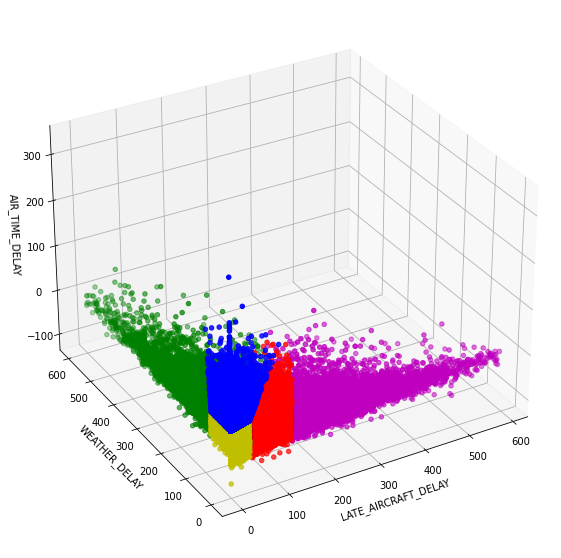

In [144]:
# Your code

LABEL_COLOR_MAP = {'c1' : 'r',
                   'c2' : 'y',
                   'c3' : 'b',
                   'c4' : 'g',
                   'c5' : 'm'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in clustering_data_processed['CLUSTERS']]

plt.rcParams['figure.figsize'] = (17, 10)
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = clustering_dataset['AIR_TIME_DELAY']
xdata = clustering_dataset['LATE_AIRCRAFT_DELAY']
ydata = clustering_dataset['WEATHER_DELAY']

ax.set_xlabel('LATE_AIRCRAFT_DELAY')
ax.set_ylabel('WEATHER_DELAY')
ax.set_zlabel('AIR_TIME_DELAY')

ax.scatter3D(xdata, ydata, zdata, c=label_color);
ax.view_init(30, -120)


    Your answer:
    